In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.io import loadmat
from sklearn.model_selection import train_test_split, cross_val_predict, cross_validate
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import log_loss
import seaborn as sns
from model_behavior import *

### Step 1: Load behavioral data

In [36]:
# 1. Load behavioral data
wd = '/Users/akshay/proj/texOdd'
bd = load_behavioral_data(wd + '/data/s097_behavior.mat')

### Step 2: Compute feature distance

In [79]:
# 2. Compute feature distance
feature_dir = '/Users/akshay/proj/TextureSynthesis/stimuli/tex-fMRI/gram_eq'
obs_lays = ['conv1_1', 'pool1', 'pool2', 'pool4']
feature_distance, trial_correct = {}, {}
for obs_lay in obs_lays:
    feature_distance[obs_lay], trial_correct[obs_lay] = compute_feature_distance(obs_lay, bd, feature_dir)

0 0.004572603146198118
50 0.0005469116980975075
100 0.0001241312953543794
150 2.223924956673562e-05
200 0.00022352964991539936
250 6.250200554452912e-05
300 0.020678048343593658
350 0.02226132078244908
400 6.767233991561428e-05
450 0.005062066150741784
500 0.0026379543903125025
550 7.407986068963535e-06
600 0.00017691076698012065
650 2.608122169128757e-05
700 5.0865728021820544e-06
750 0.023326596720848636
800 0.00022352964991539936
850 0.00021137094591133776
900 0.01669355244098386
950 0.004213734999796437
1000 2.558299448079948e-05
1050 1.0629965403519126e-05
1100 0.02128724944110333
1150 0.003235969220062973
1200 7.725480318687694e-06
1250 0.0007888186336131309
1300 0.005893524379167958
1350 3.7909032152838584e-06
1400 0.023661181986394553
1450 0.003036839234422606
1500 5.3484855394636543e-05
1550 0.0023228326563889956
1600 0.005637649959211455
1650 0.004005295397732533
1700 4.7696771350358436e-05
1750 0.0003625190274514356
1800 0.0007215969553993062
1850 0.004417385329477552
1900 0

3250 0.28169251339679735
3300 0.14185720868750468
3350 0.016009449062063474
3400 0.09698436995941001
3450 0.1001448388973441
3500 0.010240699885490645
3550 0.2771999267001676
3600 0.12354888385609963
3650 0.11145323658142198
3700 0.08352821811845118
3750 0.13246424759848208
3800 0.005565724976754449
3850 0.001973478939650275
3900 0.031035782626594788
3950 0.10241425969237683
4000 0.0044934112502169055
4050 0.13658594549354497
4100 0.04975571273912893
4150 0.11800148322556925
4200 0.10354204093251768
4250 0.17103106305050075
4300 0.014196654927188357
4350 0.06153670639370312
4400 0.12973865280104713
4450 0.015420586334886355
4500 0.17791595660967863
4550 0.08984022649920764
4600 0.03504700792553467
4650 0.030237549769383754
4700 0.09130455353179279
4750 0.001106026954924899
4800 0.00801527109036071
4850 0.0037138876388684294
4900 0.014100500771248692
4950 0.05514423806764962
5000 0.03260793082915997
5050 0.11654567722900994
5100 0.08739007204583621
5150 0.09027664542984448
5200 0.123745

### Step 3: Fit logistic regression to predict subject's performance

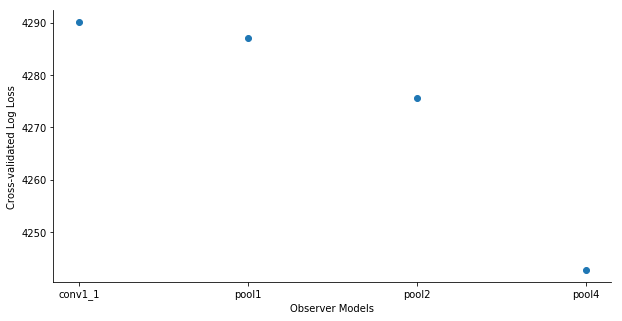

In [121]:
# 3. Fit logistic regression
def fit_logistic_regression(bd, obs_lays, feature_distance):
    valid = np.logical_not(np.isnan(bd['correct']))
    loss = np.zeros((len(obs_lays),))
    for i, obs_lay in enumerate(obs_lays):
        feat_dist = feature_distance[obs_lay]

        # get cross validated predictions.
        logReg = LogisticRegression(class_weight='balanced')
        y_pred = cross_val_predict(logReg, feat_dist[valid].reshape(-1,1), bd['correct'][valid], cv=10, method='predict_proba')
        loss[i] = -np.sum(get_log_loss(bd['correct'][valid], y_pred[:,1]))
    return loss

loss = fit_logistic_regression(bd, obs_lays, feature_distance)

# Plot log loss
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(np.arange(len(obs_lays)), loss, 'o')
plt.ylabel('Cross-validated Log Loss')
plt.xlabel('Observer Models')
ax.set_xticks(np.arange(len(obs_lays)))
ax.set_xticklabels(obs_lays);
sns.despine()

In [120]:
-np.nansum(get_log_loss(bd['correct'][valid], model_performance[valid]))

/Users/akshay/anaconda2/envs/myenv/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/Users/akshay/anaconda2/envs/myenv/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


inf

/Users/akshay/anaconda2/envs/myenv/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/Users/akshay/anaconda2/envs/myenv/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


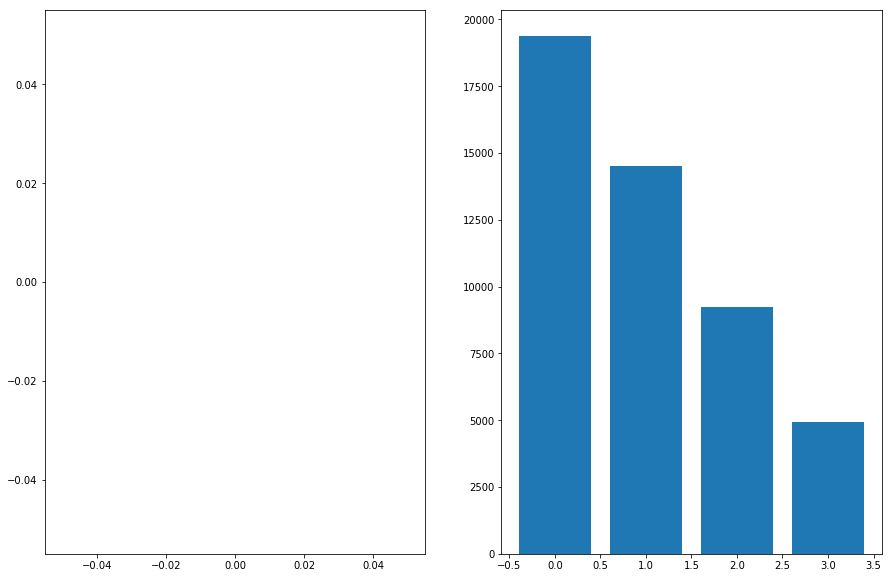

In [117]:
convert = lambda p: np.max(np.min(p, 1−np.power(10−15)), 10^-15)

valid = np.logical_not(np.isnan(bd['correct']))
hm1, hm2 = np.zeros((len(obs_lays),)), np.zeros((len(obs_lays),))
for i, obs_lay in enumerate(obs_lays):
    model_performance = trial_correct[obs_lay]
    feat_dist = feature_distance[obs_lay]
    hm1[i] = -np.sum(get_log_loss(bd['correct'][valid], model_performance[valid]))
    hm2[i] = -np.sum(get_log_loss(bd['correct'][valid], feat_dist[valid]))

fig = plt.figure(figsize=(15,10))
plt.subplot(1,2,1);
plt.bar(np.arange(len(obs_lays)), hm1);

plt.subplot(1,2,2);
plt.bar(np.arange(len(obs_lays)), hm2);